In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-store-sales/sample_submission.csv
/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


In [2]:
#Loading the Datasets
stores = pd.read_csv("../input/rossmann-store-sales/store.csv")

train = pd.read_csv("../input/rossmann-store-sales/train.csv", parse_dates = ['Date'])


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploratory Data Analysis

In [3]:
#Reading the stores dataset
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

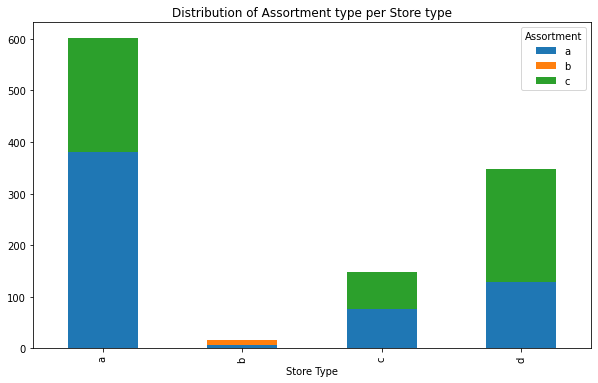

In [5]:
#Let's first do some EDA before cleaning our dataset
stores.groupby(['StoreType', 'Assortment']).size().unstack().plot(kind = 'bar', stacked = True,
                                                                 figsize = (10, 6))
plt.title("Distribution of Assortment type per Store type")
plt.xlabel("Store Type")
plt.show()

In [6]:
#Load train dataset
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Merging both the datasets.

In [7]:
#merge both the dataset
train = pd.merge(train, stores, on = 'Store', how = 'left')

As the sales during the day the store is closed will be zero, we do not require the days where stores are closed.

In [8]:
#creting the dataset with the days when stores were open
train_open = train[train.Open == 1].copy()
print (train_open.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   StateHoliday               844392 non-null  object        
 8   SchoolHoliday              844392 non-null  int64         
 9   StoreType                  844392 non-null  object        
 10  Assortment                 844392 non-null  object        
 11  CompetitionDistance        842206 non-null  float64

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


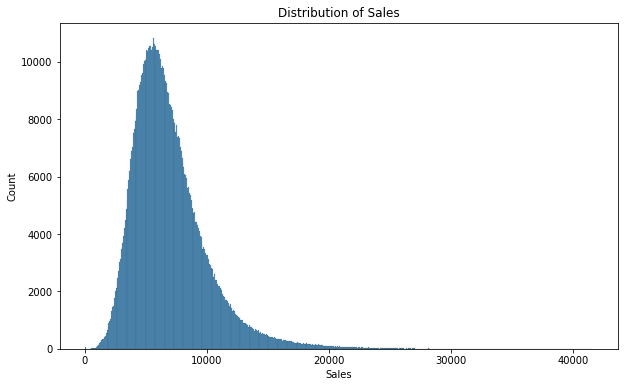

In [9]:
#Let's see the distribution of sales
plt.figure(figsize = (10, 6))
sns.histplot(train_open.Sales)
plt.title("Distribution of Sales")
plt.show()

From above we can see that the sales follow Normal Distribution with Right-skewed (Positively Skewed). 

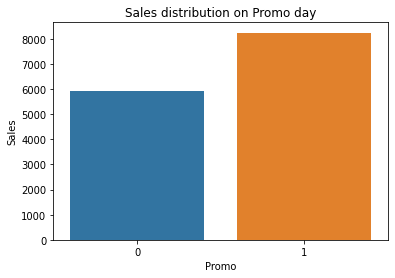

In [10]:
#effect on sales of Promotional Day
plt.figure(figsize = (6,4))
sns.barplot(x = 'Promo', y = 'Sales', data = train_open)
plt.title('Sales distribution on Promo day')
plt.show()

Sales is evenly distributed on both Promotional and Non-Promotional Day

In [11]:
train_open['StateHoliday'] = train_open['StateHoliday'].astype(str)
train_open.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

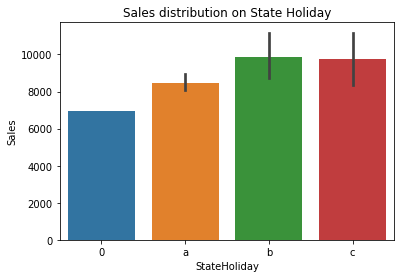

In [12]:
#effect of holidays on sales
plt.figure(figsize = (6,4))
sns.barplot(x = 'StateHoliday', y = 'Sales', data = train_open)
plt.title('Sales distribution on State Holiday')
plt.show()

Sales is higher on holidays compared to non-holidays as expected.

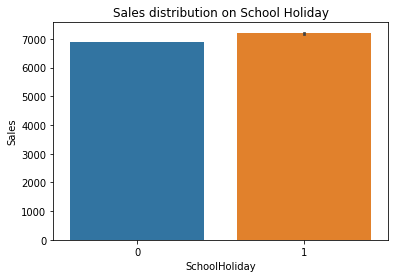

In [13]:
#Let's see the sales distribution in School Holiday
plt.figure(figsize = (6,4))
sns.barplot(x = 'SchoolHoliday', y = 'Sales', data = train_open)
plt.title('Sales distribution on School Holiday')
plt.show()

Sales doesn't seem to depend much on School Holidays

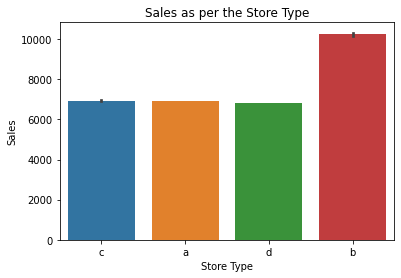

In [14]:
#Let's see which store type has more sales
sns.barplot(x = 'StoreType', y = 'Sales', data = train_open)
plt.title("Sales as per the Store Type")
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

Except for the sales in type b, sales in all other types of stores are nearly identical

# Feature Engineering

Now we will prepare our file which will be suitable to be used in different Machine Learning Models

In [15]:
def feature_ext(df):
    '''Creating the dataset with the features in the required format'''
    
    #Creating Extra Columns out of Date 
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['DayOfWeek'] = df.Date.dt.dayofweek
    df['WeekOfYear'] = df.Date.dt.weekofyear
    
    #fixing Promo and CompetitionSince columns by extending the features 
    
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x: 0 if x < 0 else x)
    
    df['PromoOpen'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) / 4
    df['PromoOpen'] = df['PromoOpen'].apply(lambda x: 0 if x < 0 else x)
    
    #Mapping month name to the Months Column
    monthname = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    df['Month'] = df['Month'].map(monthname)
    
    #changing the dtype of Promo Interval Column
    df['PromoInterval'] = df['PromoInterval'].astype(str)
    
    #Fixing PromoInterval column with creating a binary column for the value in PromoInterval
    df['IsPromoMonth'] = 0 #empty column
    for values in df.PromoInterval.unique():
        for month in values.split(','):
            df.loc[(df.Month == month) & (df.PromoInterval == values), 'IsPromoMonth'] = 1
    
    return df
    
    

In [16]:
feature_ext(train_open)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,nan,2015,Jul,31,31,82.0,NaN,0
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,Jul,31,31,92.0,64.50,1
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,Jul,31,31,103.0,52.25,1
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,nan,2015,Jul,31,31,70.0,NaN,0
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,nan,2015,Jul,31,31,3.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,1,2013-01-01,3375,566,1,0,a,1,b,...,NaN,NaN,nan,2013,Jan,1,1,76.0,NaN,0
1016827,733,1,2013-01-01,10765,2377,1,0,a,1,b,...,NaN,NaN,nan,2013,Jan,1,1,159.0,NaN,0
1016863,769,1,2013-01-01,5035,1248,1,0,a,1,b,...,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,Jan,1,1,NaN,0.25,1
1017042,948,1,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,NaN,nan,2013,Jan,1,1,NaN,NaN,0


In [17]:
#splitting the data in Numerical and Categorical data
def split_data(df):
    df_ = df.drop('Date', axis = 1)
    cols = df_.columns
    num_cols = df_._get_numeric_data().columns #getting columns with numeric data
    cat_cols = list(set(cols) - set(num_cols)) #getting the columns with categorical data
    num_df = df[num_cols]
    cat_df = df[cat_cols]
    
    return num_df, cat_df

In [18]:
num_df, cat_df = split_data(train_open)

In [19]:
#Looking at the null values in the num_df
num_df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
SchoolHoliday                     0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268619
CompetitionOpenSinceYear     268619
Promo2                            0
Promo2SinceWeek              423307
Promo2SinceYear              423307
Year                              0
Day                               0
WeekOfYear                        0
CompetitionOpen              268619
PromoOpen                    423307
IsPromoMonth                      0
dtype: int64

In [20]:
#we can fill the null values with 0 in all the columns except the CompetitionDistance column
#We will fill the CompetitionDistance column with median value of the distance
#Then we will scale the numerical data using MinMax Scaler 
from sklearn.preprocessing import MinMaxScaler

def fix_num(df):
    
    median_dist = df['CompetitionDistance'].median()
    df['CompetitionDistance'] = df['CompetitionDistance'].fillna(value = median_dist)
    
    df = df.fillna(value = 0)
    #scaling data    
    scaler = MinMaxScaler().fit(df) 
    scaled_cols = list(df.columns)
    df[scaled_cols] = scaler.transform(df)
    
    df = df[scaled_cols]
        
    return df

In [21]:
num_df = fix_num(num_df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
#we will encode the values in categorical columns using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#fixing categorical df
def fix_cat(df):
    
    df = df.drop('PromoInterval', axis = 1)
    
    df = df.fillna(method = 'ffill') #filling the null values with forward fill method
    
    encoder = OneHotEncoder(sparse = False).fit(df)
    encoded_cols = list(encoder.get_feature_names(df.columns))
    
    df[encoded_cols] = encoder.transform(df)
    
    df = df[encoded_cols]
    
    return df    

In [23]:
cat_df = fix_cat(cat_df)

In [24]:
#Now we will join the three dataset again to finally get our dataset apt for Machine Learning Model

def join_all(df1, df2):
    
    df = df1.join(df2)
            
    return df

In [25]:
train_df = join_all(num_df, cat_df)

In [26]:
train_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,Month_Nov,Month_Oct,Month_Sept,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0.000000,0.666667,0.126664,0.075122,0.0,1.0,1.0,0.016482,0.750000,0.996526,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000898,0.666667,0.145941,0.084597,0.0,1.0,1.0,0.007252,0.916667,0.996030,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.001795,0.666667,0.200091,0.111126,0.0,1.0,1.0,0.186050,1.000000,0.995533,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.002693,0.666667,0.336815,0.202761,0.0,1.0,1.0,0.007911,0.750000,0.997022,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.003591,0.666667,0.116050,0.075663,0.0,1.0,1.0,0.394119,0.333333,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# Modelling and Testing

To start with modelling and testing process we will split the train_df dataset into training and testing part.

Here Sale column is our target variable and rest of the columns are our feature variable.

In [27]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Sales', axis = 1)

y = train_df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

First we will run a plain linear regression and record our baseline model performance score and then we will run other models and compare it with our baseline score.

In [28]:
import time
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [29]:
#Initialize Linear Regression
lr = LinearRegression()

In [30]:
lr.fit(X_train, y_train) #fitting our model in training dataset
pred = lr.predict(X_test) #predicting on test data

print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, pred)))

Mean Squared Error:  0.030544130128529266


In [31]:
#let's prepare the model pipelines to run multiple models and calculate scores

def model_perform(model, X_train, X_test, y_train, y_test):
    
    start = time.time()
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, pred))
    
    end = time.time()
    time_taken  = end - start
    
    return score, time_taken

pipelines = [('RandomForesstRegressor', RandomForestRegressor()),
             ('Linear Regression', LinearRegression()),
             ('SGD Regressor', SGDRegressor()),
              ('XGBoostRegressor', XGBRegressor())]

Scores = {'Model_name': [],
          'Score': [],
          'Time_taken_in_secs': []}

for model_name, model in pipelines:
  score, time_taken = model_perform(model, X_train, X_test, y_train, y_test)
  Scores['Model_name'].append(model_name)
  Scores['Score'].append(score)
  Scores['Time_taken_in_secs'].append(time_taken)

In [32]:
#Creting a Dataframe of scores for ease of comparison
Scores = pd.DataFrame.from_dict(Scores)

In [33]:
Scores

,Model_name,Score,Time_taken_in_secs
0,RandomForesstRegressor,0.011548,775.712886
1,Linear Regression,0.030544,0.919712
2,SGD Regressor,0.031794,1.444390
3,XGBoostRegressor,0.012911,65.004543


Model performance from Random Forrest and XGBoost are better. However, XGBoost took a lot less time, so we will do the Hyper Parameter tuning using K-Fold cross-validation with the help of Grid-Search CV

# Hyper Parameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
#selecting parameters for parameter grid
param_grid = {'n_estimators': [50, 100, 250],
              'learning_rate': [0.01, 0.1, 1.0],
              'max_depth': [2, 5, 10]
              }
#creting Grid-Search model
xgb_grid = GridSearchCV(estimator = XGBRegressor(), param_grid = param_grid, 
                        scoring='neg_mean_squared_error',
                        cv = 5, n_jobs = -1, verbose=2)

Running the grid search cv with 5 fold cross validation on whole dataset will take too much time. We will use 10% of the training dataset to find the best parameters and then we will apply those best parameters to full dataset. 

In [36]:
#creating validation dataset out of training dataset with 10% of the data
X_val = X_train.iloc[:100001]
y_val = y_train.iloc[:100001]

In [37]:
%%time
xgb_grid.fit(X_val, y_val)

xgb_best = xgb_grid.best_estimator_

print("Best Score: ", xgb_grid.best_score_)
print("Best Params: ", xgb_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.5min


[CV] learning_rate=0.01, max_depth=2, n_estimators=50 ................
[CV] . learning_rate=0.01, max_depth=2, n_estimators=50, total=  16.7s
[CV] learning_rate=0.01, max_depth=2, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=100, total=  33.4s
[CV] learning_rate=0.01, max_depth=2, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=250, total= 1.4min
[CV] learning_rate=0.01, max_depth=2, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=250, total= 1.4min
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, total= 1.6min
[CV] learning_rate=0.01, max_depth=5, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=250, total= 4.2min
[CV] learning_rate=0.01, max_depth=5, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=250, total= 4.1min
[CV] l

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:705: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] learning_rate=0.01, max_depth=2, n_estimators=50 ................
[CV] . learning_rate=0.01, max_depth=2, n_estimators=50, total=  16.3s
[CV] learning_rate=0.01, max_depth=2, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=100, total=  34.3s
[CV] learning_rate=0.01, max_depth=2, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=2, n_estimators=250, total= 1.4min
[CV] learning_rate=0.01, max_depth=5, n_estimators=50 ................
[CV] . learning_rate=0.01, max_depth=5, n_estimators=50, total=  45.5s
[CV] learning_rate=0.01, max_depth=5, n_estimators=50 ................
[CV] . learning_rate=0.01, max_depth=5, n_estimators=50, total=  45.8s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, total= 1.5min
[CV] learning_rate=0.01, max_depth=5, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=250, total= 4.2min
[CV] l

[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 118.1min finished


Best Score:  -0.00014680222794094858
Best Params:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 250}
CPU times: user 3min 13s, sys: 1.73 s, total: 3min 15s
Wall time: 1h 58min 56s


In [38]:
xgb_pred = xgb_best.predict(X_test) #predicting with the best parameters on full test data

rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred)) #score

print("Root Mean Square score: ", rmse_xgb)

Root Mean Square score:  0.011247998954500408


We can observe that we have performed better with the Grid Search Method and we will use this model for our test dataset.

Before running the model to our test dataset, we need to clean our test data and then perform machine learning.

# Test data 

In [39]:
test = pd.read_csv("../input/rossmann-store-sales/test.csv", parse_dates = ['Date'])
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [40]:
#merging the test dataset with stores
test = pd.merge(test, stores, on = 'Store', how = 'left')

In [41]:
#Feature engineering
test = feature_ext(test)
test.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,1,3,2015-09-17,1.0,1,0,0,c,a,...,NaN,NaN,nan,2015,Sept,17,38,84.0,NaN,0
1,2,3,3,2015-09-17,1.0,1,0,0,a,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,Sept,17,38,105.0,54.0,0
2,3,7,3,2015-09-17,1.0,1,0,0,a,c,...,NaN,NaN,nan,2015,Sept,17,38,29.0,NaN,0
3,4,8,3,2015-09-17,1.0,1,0,0,a,a,...,NaN,NaN,nan,2015,Sept,17,38,11.0,NaN,0
4,5,9,3,2015-09-17,1.0,1,0,0,a,c,...,NaN,NaN,nan,2015,Sept,17,38,181.0,NaN,0


In [42]:
#splitting test data
num_test_df, cat_test_df = split_data(test)

In [43]:
#fixing null values in numerical test
num_test_df = fix_num(num_test_df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
#fixing categorical dataset
cat_test_df = fix_cat(cat_test_df)

In [45]:
test_df = join_all(num_test_df, cat_test_df)
test_df.head()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,StoreType_b,StoreType_c,StoreType_d,Month_Aug,Month_Sept,Assortment_a,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a
0,0.000000,0.000000,0.5,1.0,1.0,0.0,0.016482,0.750000,0.996526,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.000024,0.001795,0.5,1.0,1.0,0.0,0.186050,1.000000,0.995533,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.000049,0.005386,0.5,1.0,1.0,0.0,0.316192,0.333333,0.999007,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.000073,0.006284,0.5,1.0,1.0,0.0,0.098892,0.833333,0.999504,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.000097,0.007181,0.5,1.0,1.0,0.0,0.026503,0.666667,0.992556,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


We can see we are missing some columns in Test data as there were some values in month and holiday type which were available in train data set but not in test dataset. We will create those columns in test dataset and fill them with zero, which will help us in running our XGBoost model

In [46]:
#getting the missing columns
common_cols = np.intersect1d(train_df.columns, test_df.columns)

missing_cols = list(set(train_df.columns) - set(common_cols))

print (missing_cols)

['Month_Jan', 'Month_Apr', 'Month_Jul', 'Month_Oct', 'Month_Jun', 'Month_Nov', 'Month_May', 'Month_Mar', 'Customers', 'StateHoliday_c', 'StateHoliday_b', 'Sales', 'Month_Dec', 'Month_Feb']


In [47]:
test_df[missing_cols] = 0.0 #adding missing columns in the test_df and fill with 0.0
test = test_df.drop(['Sales', 'Id'], axis = 1) #dropping Sales and Id columns as we need to predict sales

In [48]:
test.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,...,Month_Oct,Month_Jun,Month_Nov,Month_May,Month_Mar,Customers,StateHoliday_c,StateHoliday_b,Month_Dec,Month_Feb
0,0.000000,0.5,1.0,1.0,0.0,0.016482,0.750000,0.996526,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001795,0.5,1.0,1.0,0.0,0.186050,1.000000,0.995533,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005386,0.5,1.0,1.0,0.0,0.316192,0.333333,0.999007,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006284,0.5,1.0,1.0,0.0,0.098892,0.833333,0.999504,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.007181,0.5,1.0,1.0,0.0,0.026503,0.666667,0.992556,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#Loading Submission dataset for making the submission to Kaggle
submission = pd.read_csv('../input/rossmann-store-sales/sample_submission.csv')
submission.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [50]:
#Now making predictions for test data set

test_pred = xgb_best.predict(test)

#submission data

submission['Sales'] = test_pred

#Making sales figure as zero for the time when stores were closed

submission['Sales'] = submission['Sales'] * test_df.Open


In [51]:
submission.head()

,Id,Sales
0,1,0.592276
1,2,0.621466
2,3,0.635014
3,4,0.596765
4,5,0.639323


In [52]:
submission.to_csv('submission.csv', index = None)

In [53]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv